# Time Series

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


## 2.1 CREATING TIME SERIES INDEX IN PANDAS

(1) Define a time series index using pandas function, starting from 2021-01-01, ending at 2021-12-31, and with “day” as time interval.

In [2]:
ts1 = pd.date_range('2024-01-01', '2024-12-31', freq='D')
print(ts1)

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10',
               ...
               '2024-12-22', '2024-12-23', '2024-12-24', '2024-12-25',
               '2024-12-26', '2024-12-27', '2024-12-28', '2024-12-29',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')


(2) Define a time series index using pandas function, starting from 2021-01-01, ending at 2021-12-31, and with “week” as time interval.

In [3]:
ts2 = pd.date_range('2021-01-01', '2021-12-31', freq='W')
print(ts2)



DatetimeIndex(['2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24',
               '2021-01-31', '2021-02-07', '2021-02-14', '2021-02-21',
               '2021-02-28', '2021-03-07', '2021-03-14', '2021-03-21',
               '2021-03-28', '2021-04-04', '2021-04-11', '2021-04-18',
               '2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16',
               '2021-05-23', '2021-05-30', '2021-06-06', '2021-06-13',
               '2021-06-20', '2021-06-27', '2021-07-04', '2021-07-11',
               '2021-07-18', '2021-07-25', '2021-08-01', '2021-08-08',
               '2021-08-15', '2021-08-22', '2021-08-29', '2021-09-05',
               '2021-09-12', '2021-09-19', '2021-09-26', '2021-10-03',
               '2021-10-10', '2021-10-17', '2021-10-24', '2021-10-31',
               '2021-11-07', '2021-11-14', '2021-11-21', '2021-11-28',
               '2021-12-05', '2021-12-12', '2021-12-19', '2021-12-26'],
              dtype='datetime64[ns]', freq='W-SUN')


(3) Define a time series index using pandas function, starting from 2021-01-01, ending at 2021-12-01, and with “month” as time interval.

In [4]:
ts3 = pd.date_range('2021-01-01', '2021-12-01', freq='MS')
print(ts3)

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', freq='MS')


## 2.2 CREATING TIME SERIES WHITE NOISE DATA

In the task, you will create a dataframe called df, with two columns, “Date” and “Noise”. “Date” column is timestamp from 2021-01-01 to 2021-12-31, with time interval as day. “Noise” column is white noise data, with mean of 0 and standard deviation of 1 (hint: for white noise data, you can use numpy or random function). After creating dataframe, plot the white noise versus date in a graph to have a look.

$ x_t = w_t $

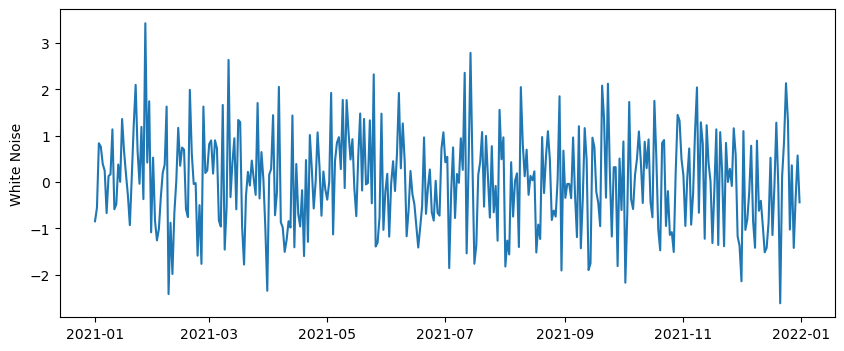

In [5]:
df = pd.DataFrame({
    'Date': pd.date_range('2021-01-01', '2021-12-31', freq='D'),
     'Noise': [random.gauss(0, 1) for i in range(365)]
    })
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['Noise'])
plt.ylabel('White Noise')
plt.show()

In [6]:
df

,Date,Noise
0,2021-01-01,-0.847762
1,2021-01-02,-0.558667
2,2021-01-03,0.837949
3,2021-01-04,0.762605
4,2021-01-05,0.388316
...,...,...
360,2021-12-27,0.361129
361,2021-12-28,-1.423849
362,2021-12-29,-0.329008
363,2021-12-30,0.572844


## 2.3 SIMULATING TIME SERIES RANDOM WALK

A random walk is another time series model where the current observation is equal to the previous observation with a random step up or down.

$x_t = x_{t-1} + w_t$


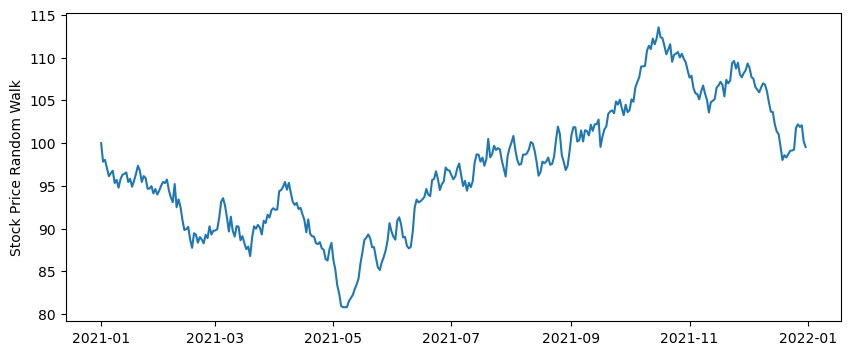

In [7]:
df = pd.DataFrame({
    'Date': pd.date_range('2021-01-01', '2021-12-31', freq='D'),
    'Noise': [100]+[random.gauss(0, 1) for i in range(364)]
    })
df['Stock'] = df['Noise'].cumsum()
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['Stock'])
plt.ylabel('Stock Price Random Walk')
plt.show()

## 2.4 SUMMARIZING TIME SERIES DATA

In this task, you will use the dataset BikeSharing.csv. You are provided hourly bike rental data spanning two years. The description of data fields are as below:

```
dteday - hourly date + timestamp
season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, 2: Mist + Cloudy, 3: Light Snow + Light Rain, 4: Heavy Rain
temp – normalized temperature in Celsius
atemp - normalized "feels like" temperature in Celsius
humidity – normalized relative humidity
windspeed – normalized wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
```

You are going to manipulate this time series data with Pandas function, and answer the following questions in order to extract useful insights.
1. Compute the monthly average temperature.
2. Compute the daily sum of casual, registered and total rentals.
3. Compute the monthly sum of total rentals in different weathers.
4. What are the peak hours of bike rental for registered users and casual users, respectively?






In [8]:
# load the dataset
#df = pd.read_csv('data/bikesharing.csv')
df = pd.read_csv(
    './dataset/BikeSharing.csv')
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)

In [9]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,0.22,0.2727,0.80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,0.24,0.2879,0.75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,0.26,0.2576,0.60,0.1642,11,108,119
2012-12-31 20:00:00,1,0,1,2,0.26,0.2576,0.60,0.1642,8,81,89
2012-12-31 21:00:00,1,0,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [10]:
df.loc["2012-01-01"]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,
2012-01-01 00:00:00,1,0,0,1,0.36,0.3788,0.66,0.0000,5,43,48
2012-01-01 01:00:00,1,0,0,1,0.36,0.3485,0.66,0.1343,15,78,93
2012-01-01 02:00:00,1,0,0,1,0.32,0.3485,0.76,0.0000,16,59,75
2012-01-01 03:00:00,1,0,0,1,0.30,0.3333,0.81,0.0000,11,41,52
2012-01-01 04:00:00,1,0,0,1,0.28,0.3030,0.81,0.0896,0,8,8
2012-01-01 05:00:00,1,0,0,1,0.28,0.2879,0.81,0.1045,0,5,5
2012-01-01 06:00:00,1,0,0,1,0.26,0.2727,0.93,0.1343,1,1,2
2012-01-01 07:00:00,1,0,0,1,0.26,0.2576,0.93,0.1642,1,6,7
2012-01-01 08:00:00,1,0,0,1,0.26,0.2727,0.87,0.1045,4,10,14


In [11]:
df.loc["2012-01-01"]["cnt"].sum()

2294

In [12]:
# insight 1: compute the monthly average temperature
monthly_temp = df.resample('ME')[['temp']].mean()
monthly_temp

,temp
dteday,
2011-01-31,0.302894
2011-02-28,0.399908
2011-03-31,0.387596
2011-04-30,0.493565
2011-05-31,0.564361
2011-06-30,0.599749
2011-07-31,0.660863
2011-08-31,0.597918
2011-09-30,0.543839


In [13]:
# insight 2: compute the daily sum of casual, register and total rentals
daily_rental = df.resample('D')[['casual', 'registered', 'cnt']].sum()
daily_rental

,casual,registered,cnt
dteday,,,
2011-01-01,331,654,985
2011-01-02,47,1313,1360
2011-01-03,137,1714,1851
2011-01-04,307,1920,2227
2011-01-05,1138,2213,3351
...,...,...,...
2012-12-27,247,1867,2114
2012-12-28,644,2451,3095
2012-12-29,159,1182,1341


In [14]:
# insight 3: compute the monthly sum of total rentals in different weathers
monthly_total_rental_weather = df.groupby([pd.Grouper(freq='ME'), 'weather'])[['cnt']].sum()
monthly_total_rental_weather

cnt
dteday     weather       
2011-01-31 1        41949
           2        17035
           3         2944
           4           36
2011-02-28 1        50050
...                   ...
2012-11-30 2        37980
           3         4987
2012-12-31 1        89501
           2        36809
           3         3275

[75 rows x 1 columns]

In [15]:

# insight 4: what are the peak hours of bike rental for registered users and casual users, respectively?
df['hour'] = df.index.hour

peak_reg = df.groupby('hour')[['registered']].mean().sort_values('registered', ascending=False)
peak_cas = df.groupby('hour')[['casual']].mean().sort_values('casual', ascending=False)

In [16]:
peak_reg

,registered
hour,
17,387.178082
18,364.390110
8,337.331499
19,262.752747
16,238.238356
7,201.009629
20,189.796703
9,188.418157
12,185.021978


In [17]:
peak_cas

,casual
hour,
14,75.567901
15,74.905350
17,74.273973
16,73.745205
13,72.308642
12,68.293956
18,61.120879
11,59.540578
19,48.770604


# ANALYSING TIME SERIES DATA WITH STATSMODEL

## 3.1 CHECKING ON TIME SERIES STATIONARITY

Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations. Load the two datasets daily-total-female-births.csv and AirPassengers.csv, and use the multiple methods to check whether the datasets are stationary.

In [18]:
# load the two datasets
#df1 = pd.read_csv('data/daily-total-female-births.csv')
#df2 = pd.read_csv('data/airpassengers.csv')
df1 = pd.read_csv(
    './dataset/daily-total-female-births.csv')
df2 = pd.read_csv(
    './dataset/airpassengers.csv')
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Month'] = pd.to_datetime(df2['Month'])
df1.set_index('Date', inplace=True)
df2.set_index('Month', inplace=True)

### 1. Visual Check on plots
You are required to use Matplotlib to plot line plots for the two time series datasets. You can review the line plots of your data and visually check if there are any obvious trends or seasonality. Your output should look like below:

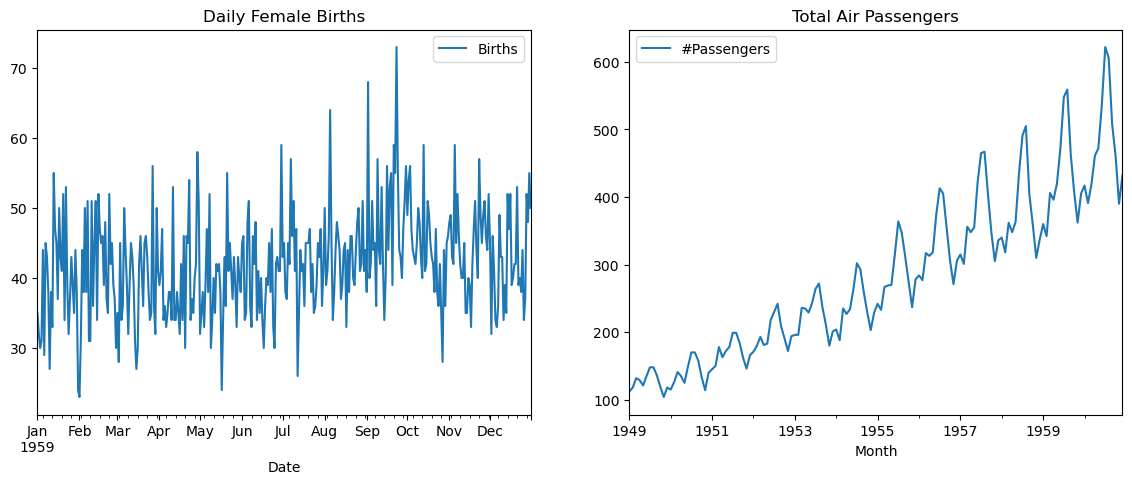

In [19]:
# Visual Check
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df1.plot(ax=ax[0])
df2.plot(ax=ax[1])
ax[0].set_title('Daily Female Births')
ax[1].set_title('Total Air Passengers')
plt.show()

### 2. Summary Statistics

A quick check to see if time series is non-stationary is to review summary statistics.
As a first step, you are required to use Matplotlib to plot histograms for both datasets.

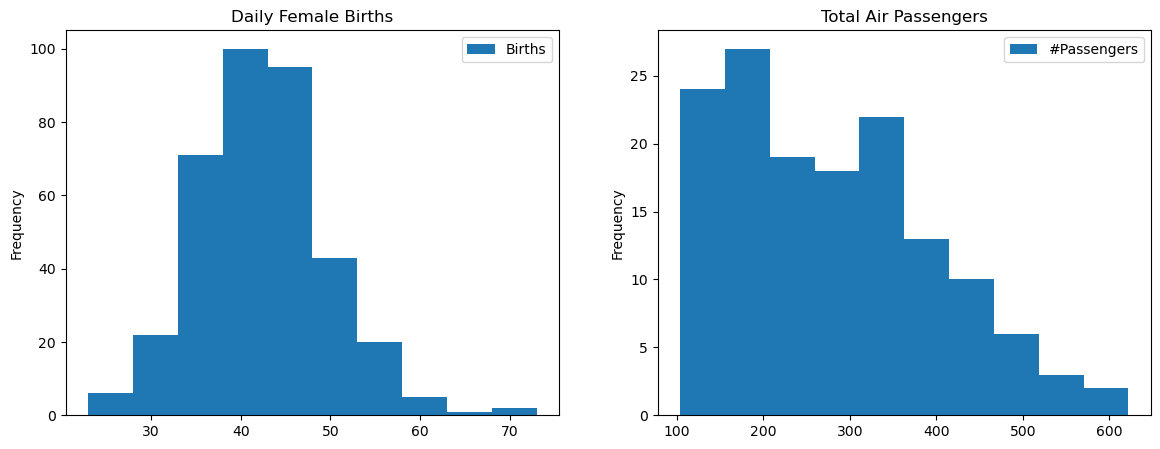

In [20]:
# Summary Statistics
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df1.plot(ax=ax[0], kind='hist')
df2.plot(ax=ax[1], kind='hist')
ax[0].set_title('Daily Female Births')
ax[1].set_title('Total Air Passengers')
plt.show()

Next, for each of the dataset, you are required to randomly split the dataset into two groups. You are going to calculate the mean and variance of each group and compare the values. Remember for a stationary time series, they should always have the same mean and variance values. Your output should look like below:

In [21]:
# Summary Statistics
X1 = df1.iloc[:len(df1)//2,0]
X2 = df1.iloc[len(df1)//2:,0]
print(f'For Female Birth Dataset:\ngroup 1 mean = {X1.mean():.2f}, \
group 2 mean = {X2.mean():.2f}, \ngroup 1 variance = {X1.var():.2f}, \
group 2 variance = {X2.var():.2f}')
print()
X3 = df2.iloc[:len(df2)//2,0]
X4 = df2.iloc[len(df2)//2:,0]
print(f'For Air Passenger Dataset:\ngroup 1 mean = {X3.mean():.2f}, \
group 2 mean = {X4.mean():.2f}, \ngroup 1 variance = {X3.var():.2f}, \
group 2 variance = {X4.var():.2f}')

For Female Birth Dataset:
group 1 mean = 39.76, group 2 mean = 44.19, 
group 1 variance = 49.49, group 2 variance = 48.98

For Air Passenger Dataset:
group 1 mean = 182.90, group 2 mean = 377.69, 
group 1 variance = 2275.69, group 2 variance = 7471.74


### 3. Statistical Test

https://en.wikipedia.org/wiki/Augmented_Dickey–Fuller_test
The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.
The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend. The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.


* P-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* P-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [22]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
result1 = adfuller(df1['Births'])
result2 = adfuller(df2['#Passengers'])
print('Female Birth Dataset p-value: %f' % result1[1])
print('Air Passenger Dataset p-value: %f' % result2[1])

Female Birth Dataset p-value: 0.000052
Air Passenger Dataset p-value: 0.991880


## 3.2 MAKE THE TIME SERIES STATIONARY BY DIFFERENCING

As we can see from the above stationarity test, the time series data AirPassengers.csv is non-stationary. One way to make the time series stationary is by differencing the time series.
Therefore, you are required to use Statsmodel function to difference the time series data.

(Hint: from statsmodels.tsa.statespace.tools import diff)
After the differencing operation, you are required to run Augmented Dickey-Fuller test to see whether the new time series is stationary. Also, you should plot the time series before and after the differencing operation.


In [23]:
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import adfuller
#df = pd.read_csv('data/AirPassengers.csv')
df = pd.read_csv(
   "./dataset/AirPassengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
# perform differencing operation
df_diff = diff(df, k_diff=1) # k_diff is number of times to difference, try 1, 2, etc.
df_diff2 = diff(df, k_diff=2)
result1 = adfuller(df)
result2 = adfuller(df_diff)
result3 = adfuller(df_diff2)
print('Air Passenger before differencing p-value: %f' % result1[1])
print('Air Passenger after differencing p-value: %f' % result2[1])
print('Air Passenger after differencing twice p-value: %f' % result3[1])

Air Passenger before differencing p-value: 0.991880
Air Passenger after differencing p-value: 0.054213
Air Passenger after differencing twice p-value: 0.000000


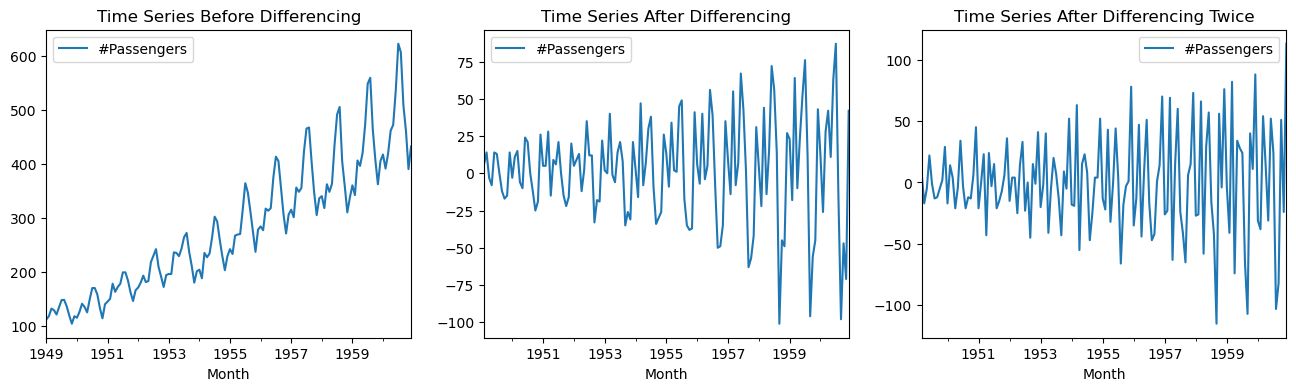

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
df.plot(ax=ax[0])
df_diff.plot(ax=ax[1])
df_diff2.plot(ax=ax[2])
ax[0].set_title('Time Series Before Differencing')
ax[1].set_title('Time Series After Differencing')
ax[2].set_title('Time Series After Differencing Twice')
plt.show()




diff1 = $ x_t - x_{t-1} $
hence
$x_t$ = diff + $x_{t-1}$

In [25]:
# We can use the panda shift operator to get x(t-1)
# https://pandas.pydata.org/docs/reference/api/pandas.Series.shift.html#pandas.Series.shift
df.shift()[:10]

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,112.0
1949-03-01,118.0
1949-04-01,132.0
1949-05-01,129.0
1949-06-01,121.0
1949-07-01,135.0
1949-08-01,148.0
1949-09-01,148.0


In [26]:
# Hence to predict x(t) you need to add the diff to x(t-1)
pred = df.shift() + df_diff

<Axes: xlabel='Month'>

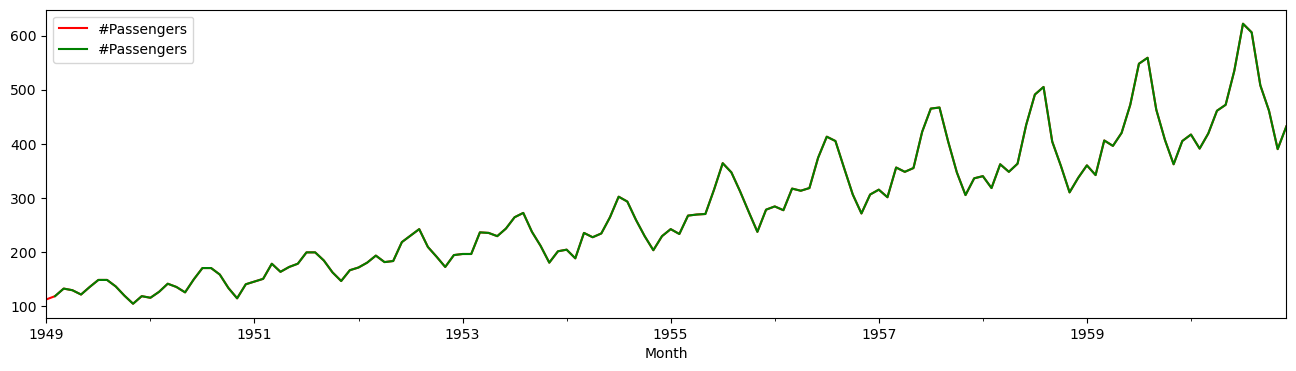

In [27]:
fig, ax = plt.subplots(1,figsize=(16, 4))
df.plot(ax=ax,c='r')
pred.plot(ax=ax,c='g')


In [28]:
# There is an alternative to using statsmodels.tsa.statespace.tools.diff
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.tools.diff.html
#
# You can use the pandas dataframe or series diff()
# https://pandas.pydata.org/docs/reference/api/pandas.Series.diff.html
df_diff[:10]

,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
1949-07-01,13.0
1949-08-01,0.0
1949-09-01,-12.0
1949-10-01,-17.0


In [29]:
pd_diff = df.diff(1)
pd_diff[:10]

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
1949-07-01,13.0
1949-08-01,0.0
1949-09-01,-12.0


In [30]:
# We can apply a similar logic to the twice differenced values
preddiff = df_diff.shift() + df_diff2
pred2 = df.shift() + preddiff

<Axes: xlabel='Month'>

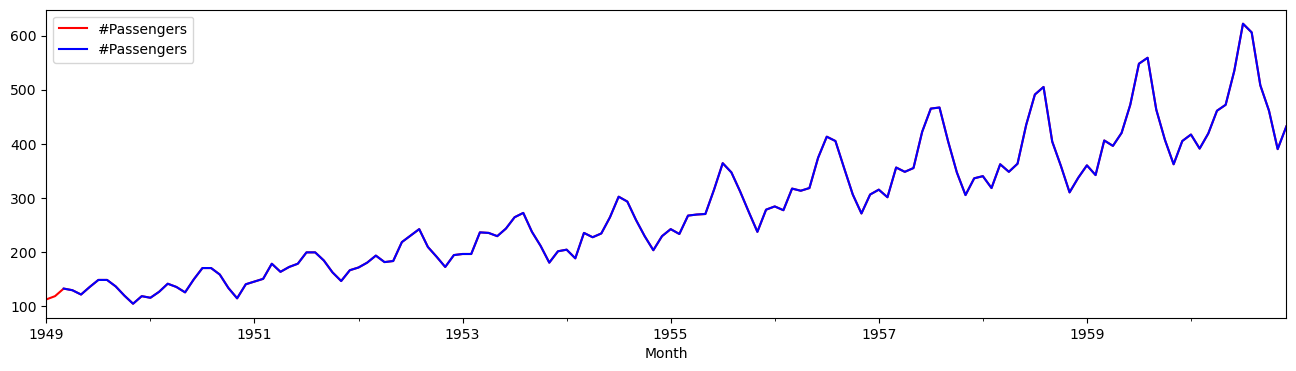

In [31]:
fig, ax = plt.subplots(1,figsize=(16, 4))
df.plot(ax=ax,c='r')
pred2.plot(ax=ax,c='b')

In [32]:
# Almost perfect match because we obtained the used the difference operator to
# get the difference values instead of predicting the diff values using a model.

Using Naive Forecast $ x_t = x_{t-1} $


<Axes: xlabel='Month'>

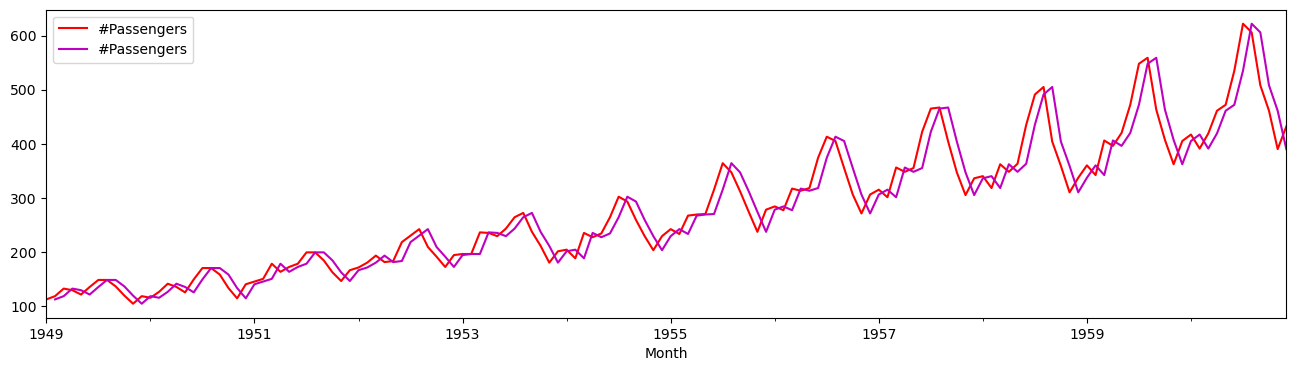

In [33]:
pred = df.shift(1)
fig, ax = plt.subplots(1,figsize=(16, 4))
df.plot(ax=ax,c='r')
pred.plot(ax=ax,c='m')

Using Naive Difference forecast

$ x_t - x_{t-1} = x_{t-1} - x_{t-2} $

preddiff = df_diff.shift(1)


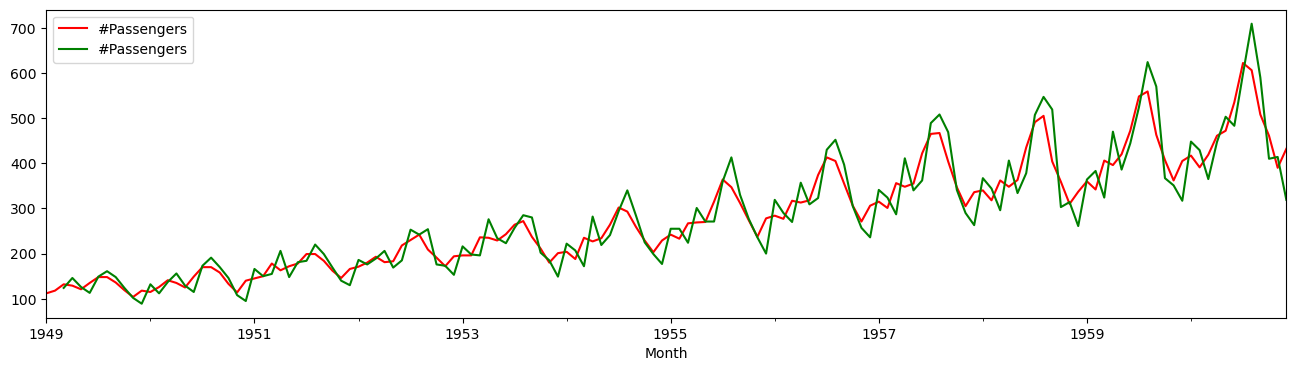

In [34]:
# Hence to predict x(t) you need to add the diff to x(t-1)

preddiff = df_diff.shift(1)
pred = df.shift() + preddiff
fig, ax = plt.subplots(1,figsize=(16, 4))
df.plot(ax=ax,c='r')
pred.plot(ax=ax,c='g')
plt.show()

# 4. PERFORM TIME SERIES FORECASTING

## 4.1 BUILD A SIMPLE MOVING AVERAGE MODEL

In this task, you are required to build a simple moving average model on the bikesharing.csv dataset. The purpose of the simple moving average is to smooth the fluctuating time series data, in order to visualize trends and generate insights.
Step 1: Calculate the daily total bike rental (using resample function).
Step 2: Plot the daily total bike rental data, and see if you can identify any trend or insights.
Step 3: Produce a 7-day moving average and a 30-day moving average data and plot on top of the daily total bike rental data. Can you see any trend and insight this time?

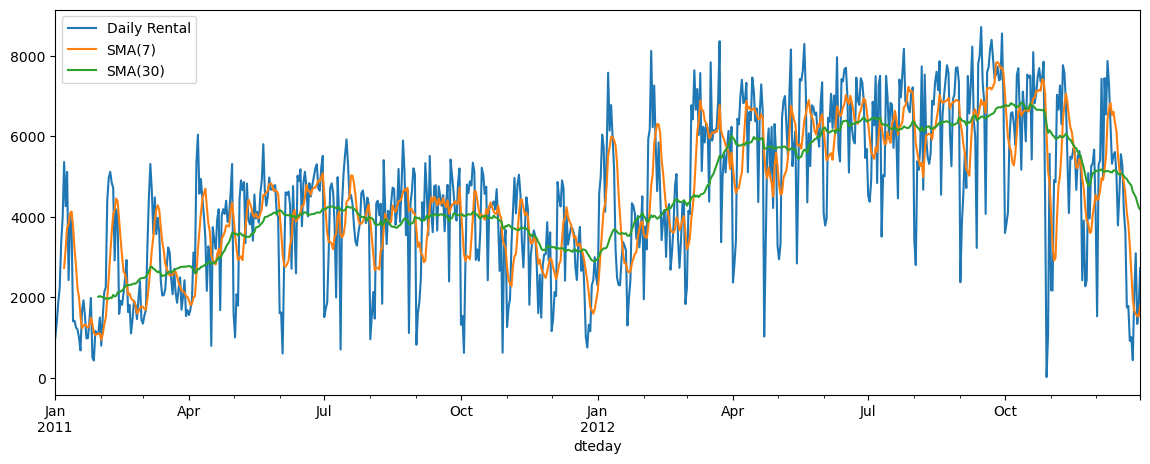

In [35]:
#df = pd.read_csv('data/bikesharing.csv')
df = pd.read_csv(
    './dataset/bikesharing.csv')
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)
daily_rental = df.resample('D')[['cnt']].sum()
ax = daily_rental.plot(figsize=(14, 5))
daily_rental.rolling(window=7).mean().plot(ax=ax)
daily_rental.rolling(window=30).mean().plot(ax=ax)
ax.legend(labels=['Daily Rental', 'SMA(7)', 'SMA(30)'])
plt.show()

## 4.2 BUILD HOLT-WINTERS EXPONENTIAL SMOOTHING MODEL

In this task, you are required to build a Holt-Winters exponential smoothing model on the bikesharing.csv dataset. The model should be able to capture historical data and predict future daily bike rental.
In order to verify the model accuracy, you should use data from 2011-01-01 to 2012-10-31 as your training data, and data from 2012-11-01 to 2012-12-31 as testing data.
Using Holt-Winters exponential smoothing model, your output should look similar to below:
(Hint: from statsmodels.tsa.holtwinters import ExponentialSmoothing)

In [36]:
# load the dataset
#df = pd.read_csv('data/bikesharing.csv')
df = pd.read_csv(
    './dataset/bikesharing.csv')

df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)
# group and calculate daily rental
daily_rental = df.resample('D')[['cnt']].sum()
# define training and testing dataset
train_data = daily_rental[daily_rental.index<'2012-11']
test_data = daily_rental[daily_rental.index>='2012-11']

/Users/sohengkhiong/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


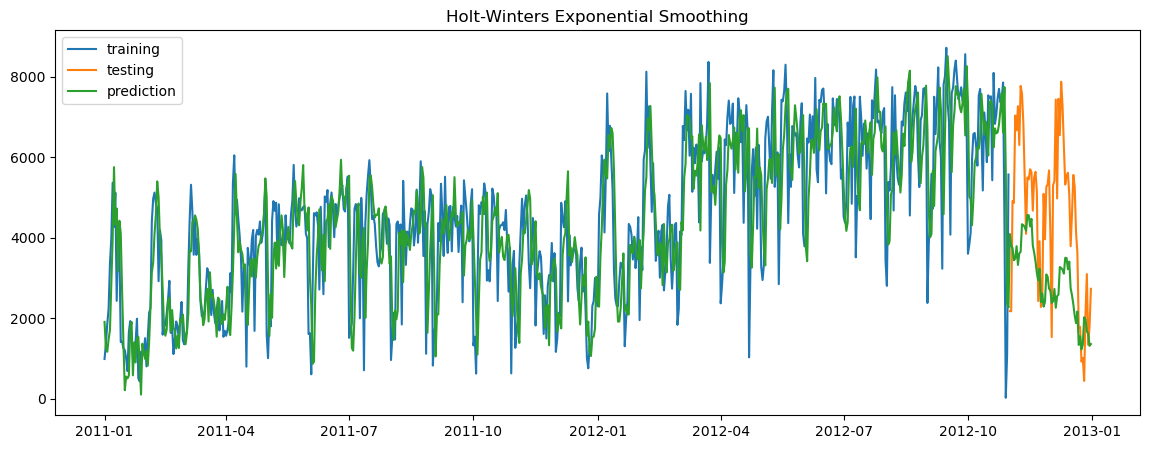

In [42]:
# Exponential Smoothing Model
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from sklearn.metrics import mean_absolute_percentage_error
es_model = HWES(train_data, seasonal_periods=28, trend='add', seasonal='add',
    damped_trend=False, freq='D').fit()
pred1 = es_model.predict(start='2011-01-01', end='2012-12-31')
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train_data, label='training')
ax.plot(test_data, label='testing')
ax.plot(pred1, label='prediction')
plt.legend()
plt.title('Holt-Winters Exponential Smoothing')
plt.show()

In [38]:
# Evaluation
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(train_data, pred1[pred1.index<'2012-11'])
mape_test = mean_absolute_percentage_error(test_data, pred1[pred1.index>='2012-11'])
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')

Model Mean Absolute Percentage Error on training data is 68.67%
Model Mean Absolute Percentage Error on testing data is 44.14%


## 4.3 BUILD ARIMA FORECAST MODEL


In this task, you are required to build a Seasonal ARIMA model on the bikesharing.csv dataset. The model should be able to capture historical data and predict future daily bike rental.
In order to verify the model accuracy, you should use data from 2011-01-01 to 2012-10-31 as your training data, and data from 2012-11-01 to 2012-12-31 as testing data.
Remember to check for stationarity first! (Exercise.)
We can use SARIMA model (ARIMA with seasonality), your model output should look similar to below:

https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html#statsmodels.tsa.statespace.sarimax.SARIMAX

In [39]:
# load the dataset
#df = pd.read_csv('data/bikesharing.csv')
df = pd.read_csv(
    './dataset/bikesharing.csv')

df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)
# group and calculate daily rental
daily_rental = df.resample('D')[['cnt']].sum()
# define training dataset
train_data = daily_rental[daily_rental.index<'2012-11']
test_data = daily_rental[daily_rental.index>='2012-11']

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.55906D+00    |proj g|=  7.43574D-02


 This problem is unconstrained.



At iterate    5    f=  8.55618D+00    |proj g|=  1.03327D-03

At iterate   10    f=  8.55605D+00    |proj g|=  7.56742D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     17      1     0     0   1.605D-05   8.556D+00
  F =   8.5559807437649731     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


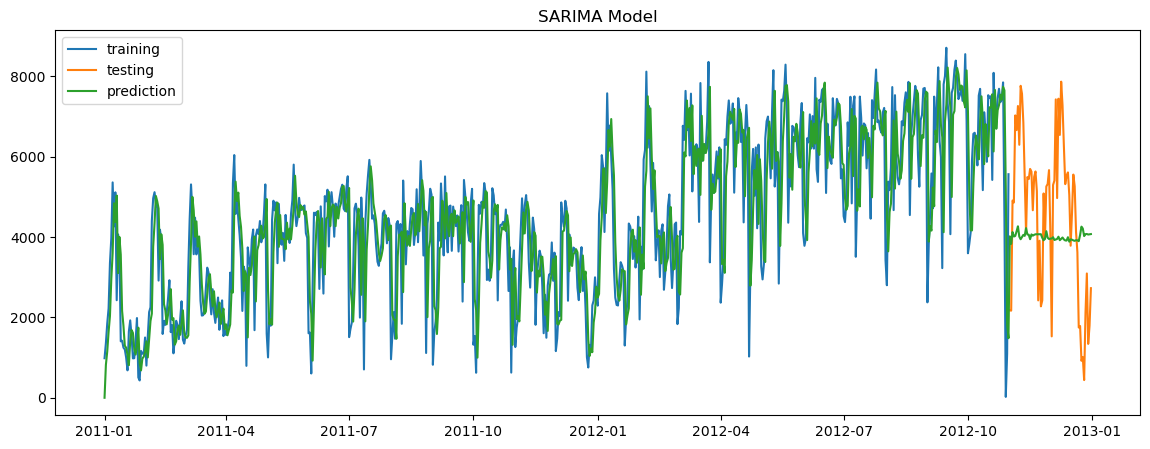

In [40]:
# SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(train_data, order=(2,1,0), seasonal_order=(2,0,1,28)).fit()
pred = sarima_model.get_prediction(start='2011-01-01', end='2012-12-31').predicted_mean
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train_data, label='training')
ax.plot(test_data, label='testing')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('SARIMA Model')
plt.show()

In [41]:
# To evaluate the model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(train_data, pred[pred.index<'2012-11'])
mape_test = mean_absolute_percentage_error(test_data, pred[pred.index>='2012-11'])
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')

Model Mean Absolute Percentage Error on training data is 65.33%
Model Mean Absolute Percentage Error on testing data is 65.12%
